In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [72]:
df_train = pd.read_csv("./credit_train.csv")
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [73]:
df_test = pd.read_csv("./credit_test.csv")
df_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

# Data Cleaning

In [76]:
df_train['Loan Status'].unique

<bound method Series.unique of 0         Fully Paid
1         Fully Paid
2         Fully Paid
3         Fully Paid
4         Fully Paid
             ...    
100509           NaN
100510           NaN
100511           NaN
100512           NaN
100513           NaN
Name: Loan Status, Length: 100514, dtype: object>

In [77]:
df_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [78]:
df_train.shape

(100514, 19)

In [79]:
df_test.isnull().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [80]:
df_test.shape

(10353, 18)

In [81]:
df_train.drop(["Months since last delinquent", "Years in current job"], axis = 1, inplace=True)

In [82]:
df_train.shape

(100514, 17)

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               80846 non-null   float64
 6   Annual Income              80846 non-null   float64
 7   Home Ownership             100000 non-null  object 
 8   Purpose                    100000 non-null  object 
 9   Monthly Debt               100000 non-null  float64
 10  Years of Credit History    100000 non-null  float64
 11  Number of Open Accounts    100000 non-null  float64
 12  Number of Credit Problems  100000 non-null  float64
 13  Current Credit Balance     10

In [84]:
c = df_train['Credit Score'].mean()
print(c)

1076.4560893550702


In [85]:
a = df_train['Annual Income'].mean()
print(a)

1378276.559842169


In [86]:
df_train['Credit Score'].fillna(c,inplace=True)

In [87]:
df_train['Annual Income'].fillna(a,inplace=True)

In [88]:
df_train.isnull().sum()

Loan ID                      514
Customer ID                  514
Loan Status                  514
Current Loan Amount          514
Term                         514
Credit Score                   0
Annual Income                  0
Home Ownership               514
Purpose                      514
Monthly Debt                 514
Years of Credit History      514
Number of Open Accounts      514
Number of Credit Problems    514
Current Credit Balance       514
Maximum Open Credit          516
Bankruptcies                 718
Tax Liens                    524
dtype: int64

In [89]:
df_train.dropna(inplace=True)

In [90]:
df_train.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [91]:
temp = df_train['Loan Status']
df_train.drop(['Loan Status'],axis=1,inplace=True)
df_train['Loan Status'] = temp

In [92]:
df_train['Loan Status'].replace(['Fully Paid', 'Charged Off'],[1, 0], inplace=True)

In [93]:
df_train['Term'].replace(['Long Term', 'Short Term'],[1, 0], inplace=True)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    99794 non-null  object 
 1   Customer ID                99794 non-null  object 
 2   Current Loan Amount        99794 non-null  float64
 3   Term                       99794 non-null  int64  
 4   Credit Score               99794 non-null  float64
 5   Annual Income              99794 non-null  float64
 6   Home Ownership             99794 non-null  object 
 7   Purpose                    99794 non-null  object 
 8   Monthly Debt               99794 non-null  float64
 9   Years of Credit History    99794 non-null  float64
 10  Number of Open Accounts    99794 non-null  float64
 11  Number of Credit Problems  99794 non-null  float64
 12  Current Credit Balance     99794 non-null  float64
 13  Maximum Open Credit        99794 non-null  flo

In [95]:
df_train.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,0,709.000000,1.167493e+06,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,0,1076.456089,1.378277e+06,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,0,741.000000,2.231892e+06,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,1,721.000000,8.069490e+05,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,0,1076.456089,1.378277e+06,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1


# EDA

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    99794 non-null  object 
 1   Customer ID                99794 non-null  object 
 2   Current Loan Amount        99794 non-null  float64
 3   Term                       99794 non-null  int64  
 4   Credit Score               99794 non-null  float64
 5   Annual Income              99794 non-null  float64
 6   Home Ownership             99794 non-null  object 
 7   Purpose                    99794 non-null  object 
 8   Monthly Debt               99794 non-null  float64
 9   Years of Credit History    99794 non-null  float64
 10  Number of Open Accounts    99794 non-null  float64
 11  Number of Credit Problems  99794 non-null  float64
 12  Current Credit Balance     99794 non-null  float64
 13  Maximum Open Credit        99794 non-null  flo

In [97]:
df_train.corr()

C:\Users\rishi\AppData\Local\Temp\ipykernel_20908\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
Current Loan Amount,1.000000,-0.059036,-0.095117,0.013078,-0.006571,0.019303,0.001656,-0.002834,0.003992,-0.001126,-0.000611,-0.002039,0.194571
Term,-0.059036,1.000000,0.031518,0.078250,0.158201,0.042048,0.082463,-0.026520,0.104860,0.008639,-0.028962,-0.003569,-0.110885
Credit Score,-0.095117,0.031518,1.000000,-0.016989,-0.001457,-0.008652,0.005725,-0.002786,0.000168,-0.002073,-0.006258,0.004764,-0.410988
Annual Income,0.013078,0.078250,-0.016989,1.000000,0.438551,0.144903,0.131580,-0.015489,0.284287,0.038990,-0.043115,0.037079,0.046703
Monthly Debt,-0.006571,0.158201,-0.001457,0.438551,1.000000,0.199743,0.411185,-0.055744,0.481000,0.039532,-0.078977,0.020025,-0.008023
Years of Credit History,0.019303,0.042048,-0.008652,0.144903,0.199743,1.000000,0.132226,0.061887,0.208432,0.030742,0.066248,0.017345,0.023650
Number of Open Accounts,0.001656,0.082463,0.005725,0.131580,0.411185,0.132226,1.000000,-0.014184,0.227776,0.030985,-0.024582,0.006499,-0.012166
Number of Credit Problems,-0.002834,-0.026520,-0.002786,-0.015489,-0.055744,0.061887,-0.014184,1.000000,-0.112704,-0.012011,0.752941,0.581352,-0.002347
Current Credit Balance,0.003992,0.104860,0.000168,0.284287,0.481000,0.208432,0.227776,-0.112704,1.000000,0.138464,-0.122609,-0.015677,0.009332
Maximum Open Credit,-0.001126,0.008639,-0.002073,0.038990,0.039532,0.030742,0.030985,-0.012011,0.138464,1.000000,-0.014574,-0.001022,0.008215


In [98]:
import seaborn as sns

C:\Users\rishi\AppData\Local\Temp\ipykernel_20908\1376617749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


<Axes: >

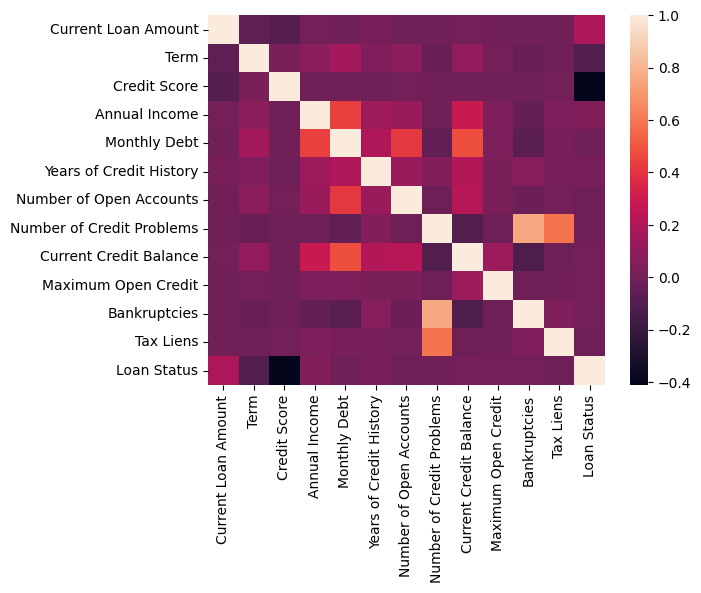

In [99]:
sns.heatmap(df_train.corr())

C:\Users\rishi\AppData\Local\Temp\ipykernel_20908\1647602056.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(x=df_train['Monthly Debt'],y=df_train['Annual Income'],palette='Oranges')


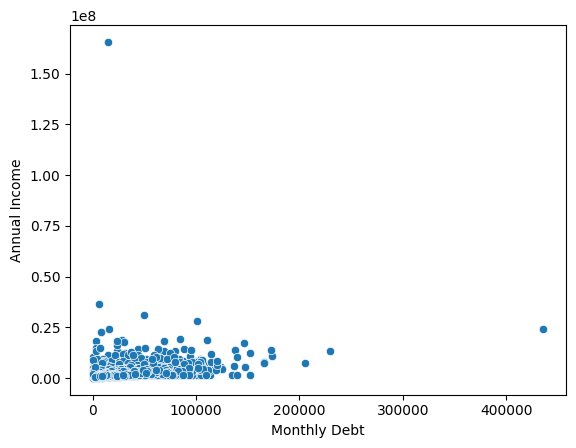

In [100]:
g = sns.scatterplot(x=df_train['Monthly Debt'],y=df_train['Annual Income'],palette='Oranges')
fig = g.get_figure()

In [101]:
values = df_train['Term'].value_counts()
mylabels = ['Long Term','Short Term']

In [102]:
values

0    72002
1    27792
Name: Term, dtype: int64

In [103]:
df_train['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [104]:
values1 = df_train['Home Ownership'].value_counts()
mylabels1 = ['Rent','Own Home','Home Mortgage','HaveMortgage']

In [105]:
values1

Home Mortgage    48334
Rent             42085
Own Home          9162
HaveMortgage       213
Name: Home Ownership, dtype: int64

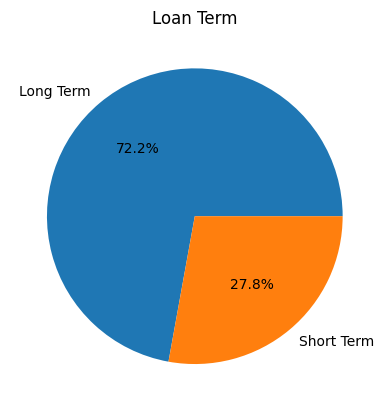

In [106]:
plt.pie(values,labels=mylabels,autopct='%1.1f%%')
plt.title('Loan Term')
plt.show()

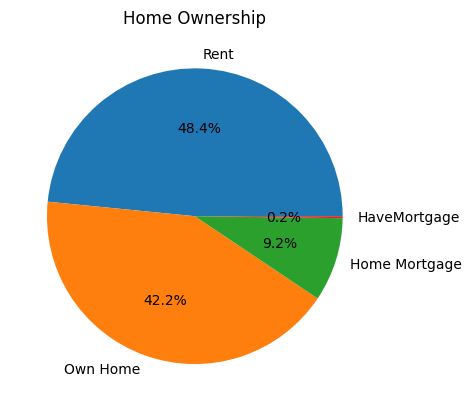

In [107]:
plt.pie(values1,labels=mylabels1,autopct='%1.1f%%')
plt.title('Home Ownership')
plt.show()

In [108]:
b = df_train['Bankruptcies'].value_counts()
print(b)

0.0    88772
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64


c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


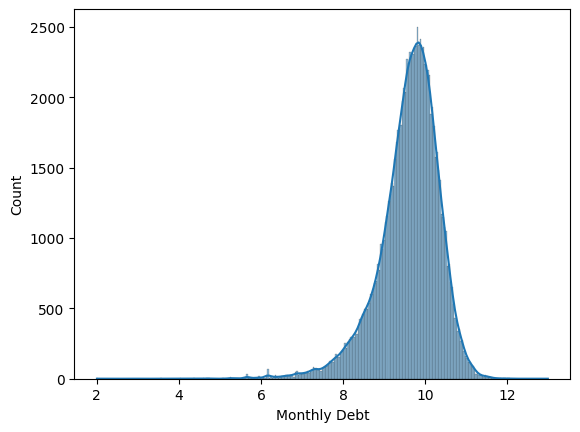

In [109]:
m = sns.histplot(np.log(df_train['Monthly Debt']), kde = True)
fig = m.get_figure()

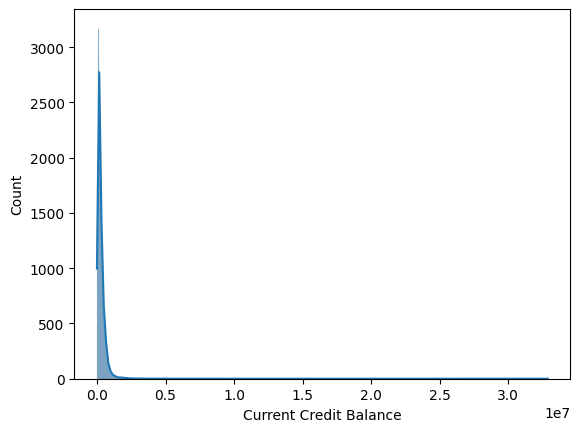

In [110]:
n = sns.histplot((df_train['Current Credit Balance']), kde = True)
fig = n.get_figure()

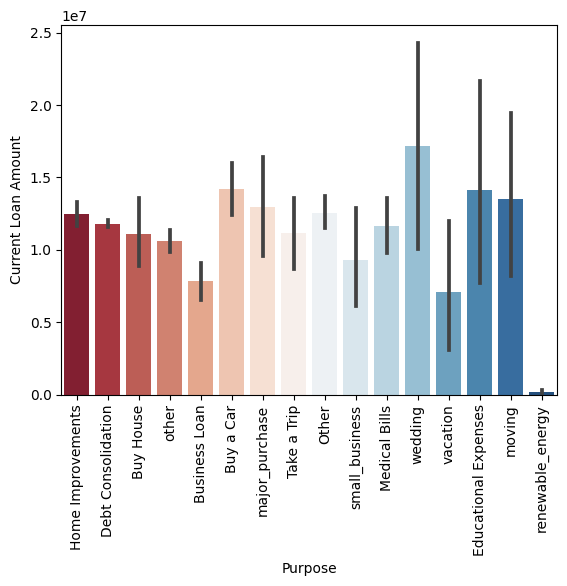

In [111]:
g = sns.barplot(x=df_train['Purpose'],y=df_train['Current Loan Amount'],palette='RdBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()

In [112]:
df_train.drop(columns=['Loan ID','Customer ID','Home Ownership'],inplace= True)
df_train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,0,709.000000,1.167493e+06,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,0,1076.456089,1.378277e+06,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,0,741.000000,2.231892e+06,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,1,721.000000,8.069490e+05,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,0,1076.456089,1.378277e+06,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        99794 non-null  float64
 1   Term                       99794 non-null  int64  
 2   Credit Score               99794 non-null  float64
 3   Annual Income              99794 non-null  float64
 4   Purpose                    99794 non-null  object 
 5   Monthly Debt               99794 non-null  float64
 6   Years of Credit History    99794 non-null  float64
 7   Number of Open Accounts    99794 non-null  float64
 8   Number of Credit Problems  99794 non-null  float64
 9   Current Credit Balance     99794 non-null  float64
 10  Maximum Open Credit        99794 non-null  float64
 11  Bankruptcies               99794 non-null  float64
 12  Tax Liens                  99794 non-null  float64
 13  Loan Status                99794 non-null  int

In [114]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# df = encoder.fit_transform(df_train[['color']])

In [115]:
df_train.drop(['Purpose'],axis=1,inplace=True)

# Model Training

In [116]:
df_train

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,1,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,0,725.000000,4.754370e+05,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,1
99996,99999999.0,0,732.000000,1.289416e+06,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,1
99997,103136.0,0,742.000000,1.150545e+06,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,1
99998,530332.0,0,746.000000,1.717524e+06,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,1


In [117]:
x = df_train.drop(columns = 'Loan Status')
y = df_train['Loan Status']

In [118]:
x.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,1,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [119]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan Status, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.752575253517175


In [123]:
model.predict(x_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.8182291875425869


In [125]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [126]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.7072427752615336


In [127]:
model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.8134995390596818


In [129]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.7344983766884444


In [131]:
model.predict(x_test)

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [132]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.8179886969417612


c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.69911e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [133]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.8180287787085655


In [135]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score - ',accuracy_score(y_test,y_pred))

Accuracy Score -  0.7894504789771133


In [137]:
model.predict(x_test)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1977  3681]
 [ 1572 17719]]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43      5658
           1       0.83      0.92      0.87     19291

    accuracy                           0.79     24949
   macro avg       0.69      0.63      0.65     24949
weighted avg       0.77      0.79      0.77     24949



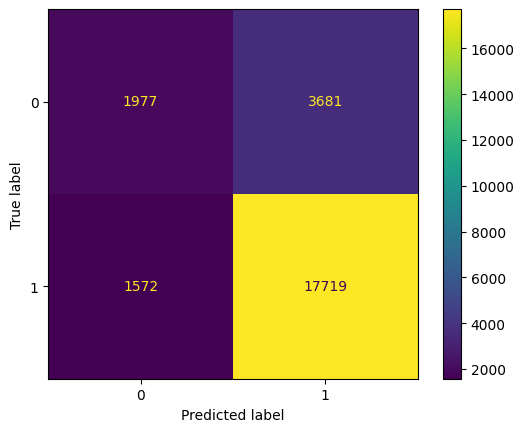

In [139]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

The best applied on this dataset was the Gradient Boost Classifier